✅ Dataset carregado com sucesso!


,transaction_id,date,product_category,product_name,units_sold,unit_price,total_revenue,region,payment_method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.989990,1999.979980,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.989990,499.989990,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.989998,209.970001,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.990000,63.959999,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.989998,89.989998,Europe,PayPal


,date,year_month
0,2024-01-01,2024-01
1,2024-01-02,2024-01
2,2024-01-03,2024-01
3,2024-01-04,2024-01
4,2024-01-05,2024-01



 Faturamento mensal:


,year_month,total_revenue
0,2024-01,14548.320312
1,2024-02,10803.370117
2,2024-03,12849.240234
3,2024-04,12451.689453
4,2024-05,8455.490234
5,2024-06,7384.549805
6,2024-07,6797.080078
7,2024-08,7278.109863


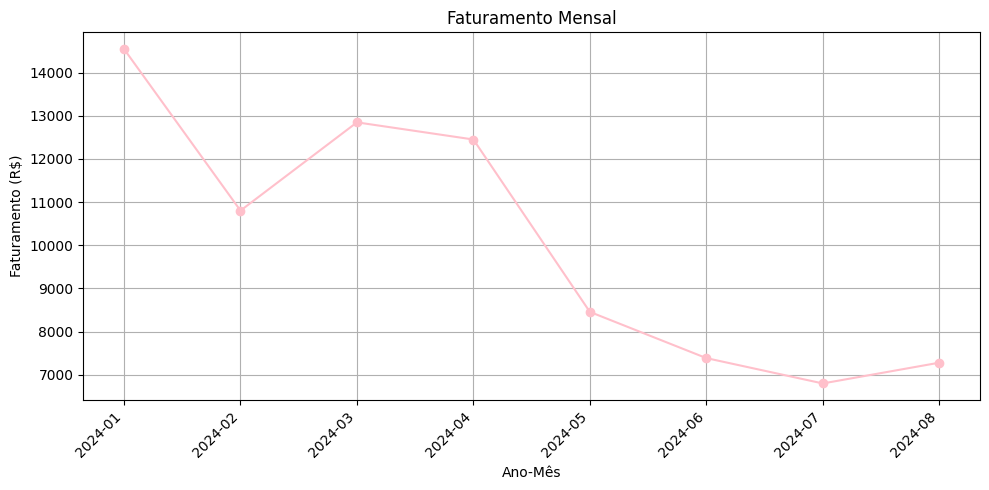

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

#carregamento
df = pd.read_parquet(
    'C:/Users/samar/OneDrive/Documentos/ads-unipe/Analise de vendas de e-commerce/data/ecommerce_clean.parquet'
)
print("✅ Dataset carregado com sucesso!")
#lembrar da estrutura anterior
display(df.head())

#garantindo que esta em formato de data real
df['date'] = pd.to_datetime(df['date'])


df['year_month'] = df['date'].dt.to_period('M').astype(str)

display(df[['date', 'year_month']].head())

#faturamento mensal
monthly_revenue = (
    df.groupby('year_month')['total_revenue']
    .sum()
    .reset_index()
    .sort_values('year_month')
)

print("\n Faturamento mensal:")
display(monthly_revenue)


plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['year_month'], monthly_revenue['total_revenue'], marker='o', color="pink")
plt.title('Faturamento Mensal')
plt.xlabel('Ano-Mês')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()